In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['axes.grid'] = False
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [24]:
tickers = [ "HDFCBANK.NS", "IDFCFIRSTB.NS", "PNB.NS", "HINDUNILVR.NS", "ZYDUSWELL.NS", "PGHH.NS", "M&M.NS", "APOLLOTYRE.NS", "HEROMOTOCO.NS", "CIPLA.NS", "GLENMARK.NS",
            "ABBOTINDIA.NS", "INFY.NS", "TATAELXSI.NS"] #"KPITTECH.NS"

In [25]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from datetime import timedelta
today = "2022-03-31"
start = "2017-03-31"
data = pd.DataFrame()
for ticker in tickers:
    df_ticker = yf.download(ticker, start=start, end=today).rename(columns={"Close": ticker})[[ticker]]
    data = pd.concat([data, df_ticker], axis=1)
# data.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
import numpy as np
from tqdm import tqdm
best_cagr = 0
best_weights = None
for i in tqdm(range(100000)):
    weights = list(np.random.dirichlet(np.ones(len(tickers))))
    df = data.copy()
    final_amount = 50000000
    for i,ticker in enumerate(tickers):
        df[f"{ticker}units"] = final_amount*weights[i]/df[ticker].iloc[-1]
        df[f"{ticker}value"] = df[f"{ticker}units"]*df[ticker]
    df["PortfolioValue"] = df[[f"{ticker}value" for ticker in tickers]].sum(axis=1)
    cagr = (df["PortfolioValue"].iloc[-1]/df["PortfolioValue"].iloc[0])**(1/5)-1
    if cagr>best_cagr:
        best_cagr = cagr
        best_weights = weights
        print(cagr)

  0%|          | 43/100000 [00:00<07:51, 212.01it/s]

0.05407014549219813
0.1191328209007918
0.1417664781036081


  0%|          | 193/100000 [00:00<08:53, 187.20it/s]

0.16033155525992981


  1%|▏         | 1485/100000 [00:06<07:21, 223.03it/s]

0.16129807960793996


  3%|▎         | 2865/100000 [00:13<07:11, 225.12it/s]

0.1753413264147594


  9%|▉         | 9399/100000 [00:42<07:00, 215.29it/s]

0.19342414857239265


 29%|██▉       | 28796/100000 [02:08<05:13, 226.79it/s]

0.20367682154901057


 32%|███▏      | 32350/100000 [02:24<04:57, 227.49it/s]

0.21573985516625283


 91%|█████████ | 91020/100000 [06:47<00:40, 223.31it/s]

0.2513135884546258


100%|██████████| 100000/100000 [07:27<00:00, 223.33it/s]


In [53]:
df = data.copy()
final_amount = 50000000
# best_weights = [6.4,
#  2.8,
#  0,
#  7.4,
#  7.1,
#  6.5,
#  6.4,
#  3.7,
#  3.6,
#  6.5,
#  3,
#  10.6,
#  9.1,
#  11.9,
#  15]
# best_weights = [weight/100 for weight in best_weights]
for i,ticker in enumerate(tickers):
    df[f"{ticker}units"] = final_amount*best_weights[i]/df[ticker].iloc[-1]
    df[f"{ticker}value"] = df[f"{ticker}units"]*df[ticker]
df["PortfolioValue"] = df[[f"{ticker}value" for ticker in tickers]].sum(axis=1)
cagr = (df["PortfolioValue"].iloc[-1]/df["PortfolioValue"].iloc[0])**(1/5)-1

In [56]:
for i in zip(tickers, best_weights):
    print(i)

('HDFCBANK.NS', 2.8771867681277157)
('IDFCFIRSTB.NS', 0)
('PNB.NS', 0)
('HINDUNILVR.NS', 13.622943963447675)
('ZYDUSWELL.NS', 0)
('PGHH.NS', 7.094956282840026)
('M&M.NS', 0)
('APOLLOTYRE.NS', 5.633251704068676)
('HEROMOTOCO.NS', 0)
('CIPLA.NS', 0)
('GLENMARK.NS', 0)
('ABBOTINDIA.NS', 8.471631011488787)
('INFY.NS', 12.074187992089497)
('TATAELXSI.NS', 50.22584227793763)


In [55]:
best_weights = [weight*100 for weight in best_weights]

In [50]:
sum(best_weights)

1.0

In [48]:
best_weights[3] = best_weights[3] + 0.02931574339866927
best_weights[11] = best_weights[11] + 0.02931574339866927

In [38]:
best_weights[1] = best_weights[2] =best_weights[4]=best_weights[6]=best_weights[8]=best_weights[9]=best_weights[10]=0

In [54]:
cagr

0.2968946625049649

<AxesSubplot:xlabel='Date'>

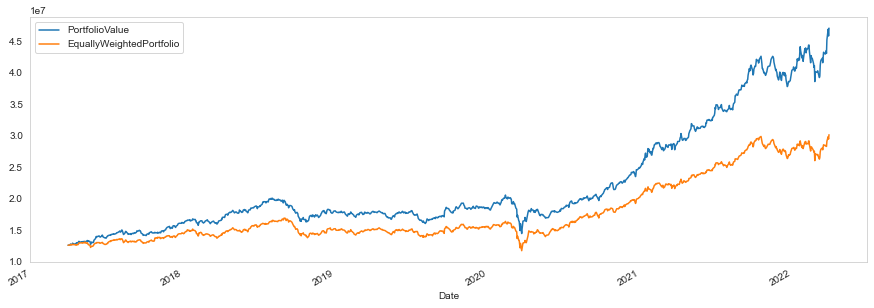

In [51]:
initial_amount = df["PortfolioValue"].iloc[0]
for i,ticker in enumerate(tickers):
    df[f"{ticker}unitsEQ"] = initial_amount*(1/14)/df[ticker].iloc[0]
    df[f"{ticker}valueEQ"] = df[f"{ticker}unitsEQ"]*df[ticker]
df["EquallyWeightedPortfolio"] = df[[f"{ticker}valueEQ" for ticker in tickers]].sum(axis=1)
df[["PortfolioValue", "EquallyWeightedPortfolio"]].plot()

In [ ]:
df

In [ ]:
from skopt import gp_minimize
from skopt.space import Real
search_space = list()
for i in range(len(tickers)):
    search_space.append(Real(0, 1, 'uniform', name=f'{1+i}'))

def evaluate_model(params):
    weights = list(params)
    weights = [weight/sum(weights) for weight in weights]
    df = data.copy()
    final_amount = 50000000
    for i,ticker in enumerate(tickers):
        df[f"{ticker}units"] = final_amount*weights[i]/df[ticker].iloc[-1]
        df[f"{ticker}value"] = df[f"{ticker}units"]*df[ticker]
    df["PortfolioValue"] = df[[f"{ticker}value" for ticker in tickers]].sum(axis=1)
    cagr = (df["PortfolioValue"].iloc[-1]/df["PortfolioValue"].iloc[0])**(1/5)-1
    return -cagr

result = gp_minimize(evaluate_model, search_space)


In [ ]:
result.x